<b> Working with database connection </b>

1. Create connection        
2. Create cursor         
3. Create Query string       
4. Execute the query       
5. Commit to the query       
6. Close the cursor     
7. Close the connection     

## [SQLITE](https://www.sqlite.org/index.html) 

SQLite is a software library that provides a relational database management system. The lite in SQLite means lightweight in terms of setup, database administration, and required resources.     

SQLite has the following noticeable features: self-contained, serverless, zero-configuration, transactional.    

### [DB Browser for SQLite](https://sqlitebrowser.org/)

## [SQLite Tutorial](https://www.sqlitetutorial.net/what-is-sqlite/)

## [Examples in our lectures](https://pynative.com/python-sqlite/)

# [Difference between SQLite and MySQL](https://www.hostinger.com/tutorials/sqlite-vs-mysql-whats-the-difference/#:~:text=SQLite%20is%20a%20server%2Dless,to%20interact%20over%20a%20network.)

The following diagram illustrates the RDBMS (relational Database management system) client/server architecture:

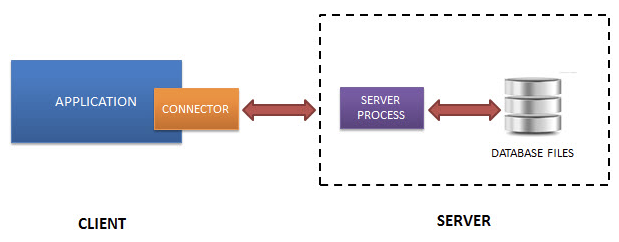

The following diagram illustrates the SQLite

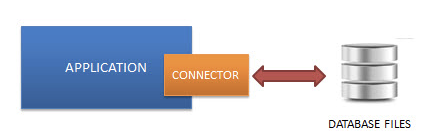


## [SQLite Database Example and tutorials](https://www.sqlitetutorial.net)

## [SQLite Sample Database](https://www.sqlitetutorial.net/sqlite-sample-database/)

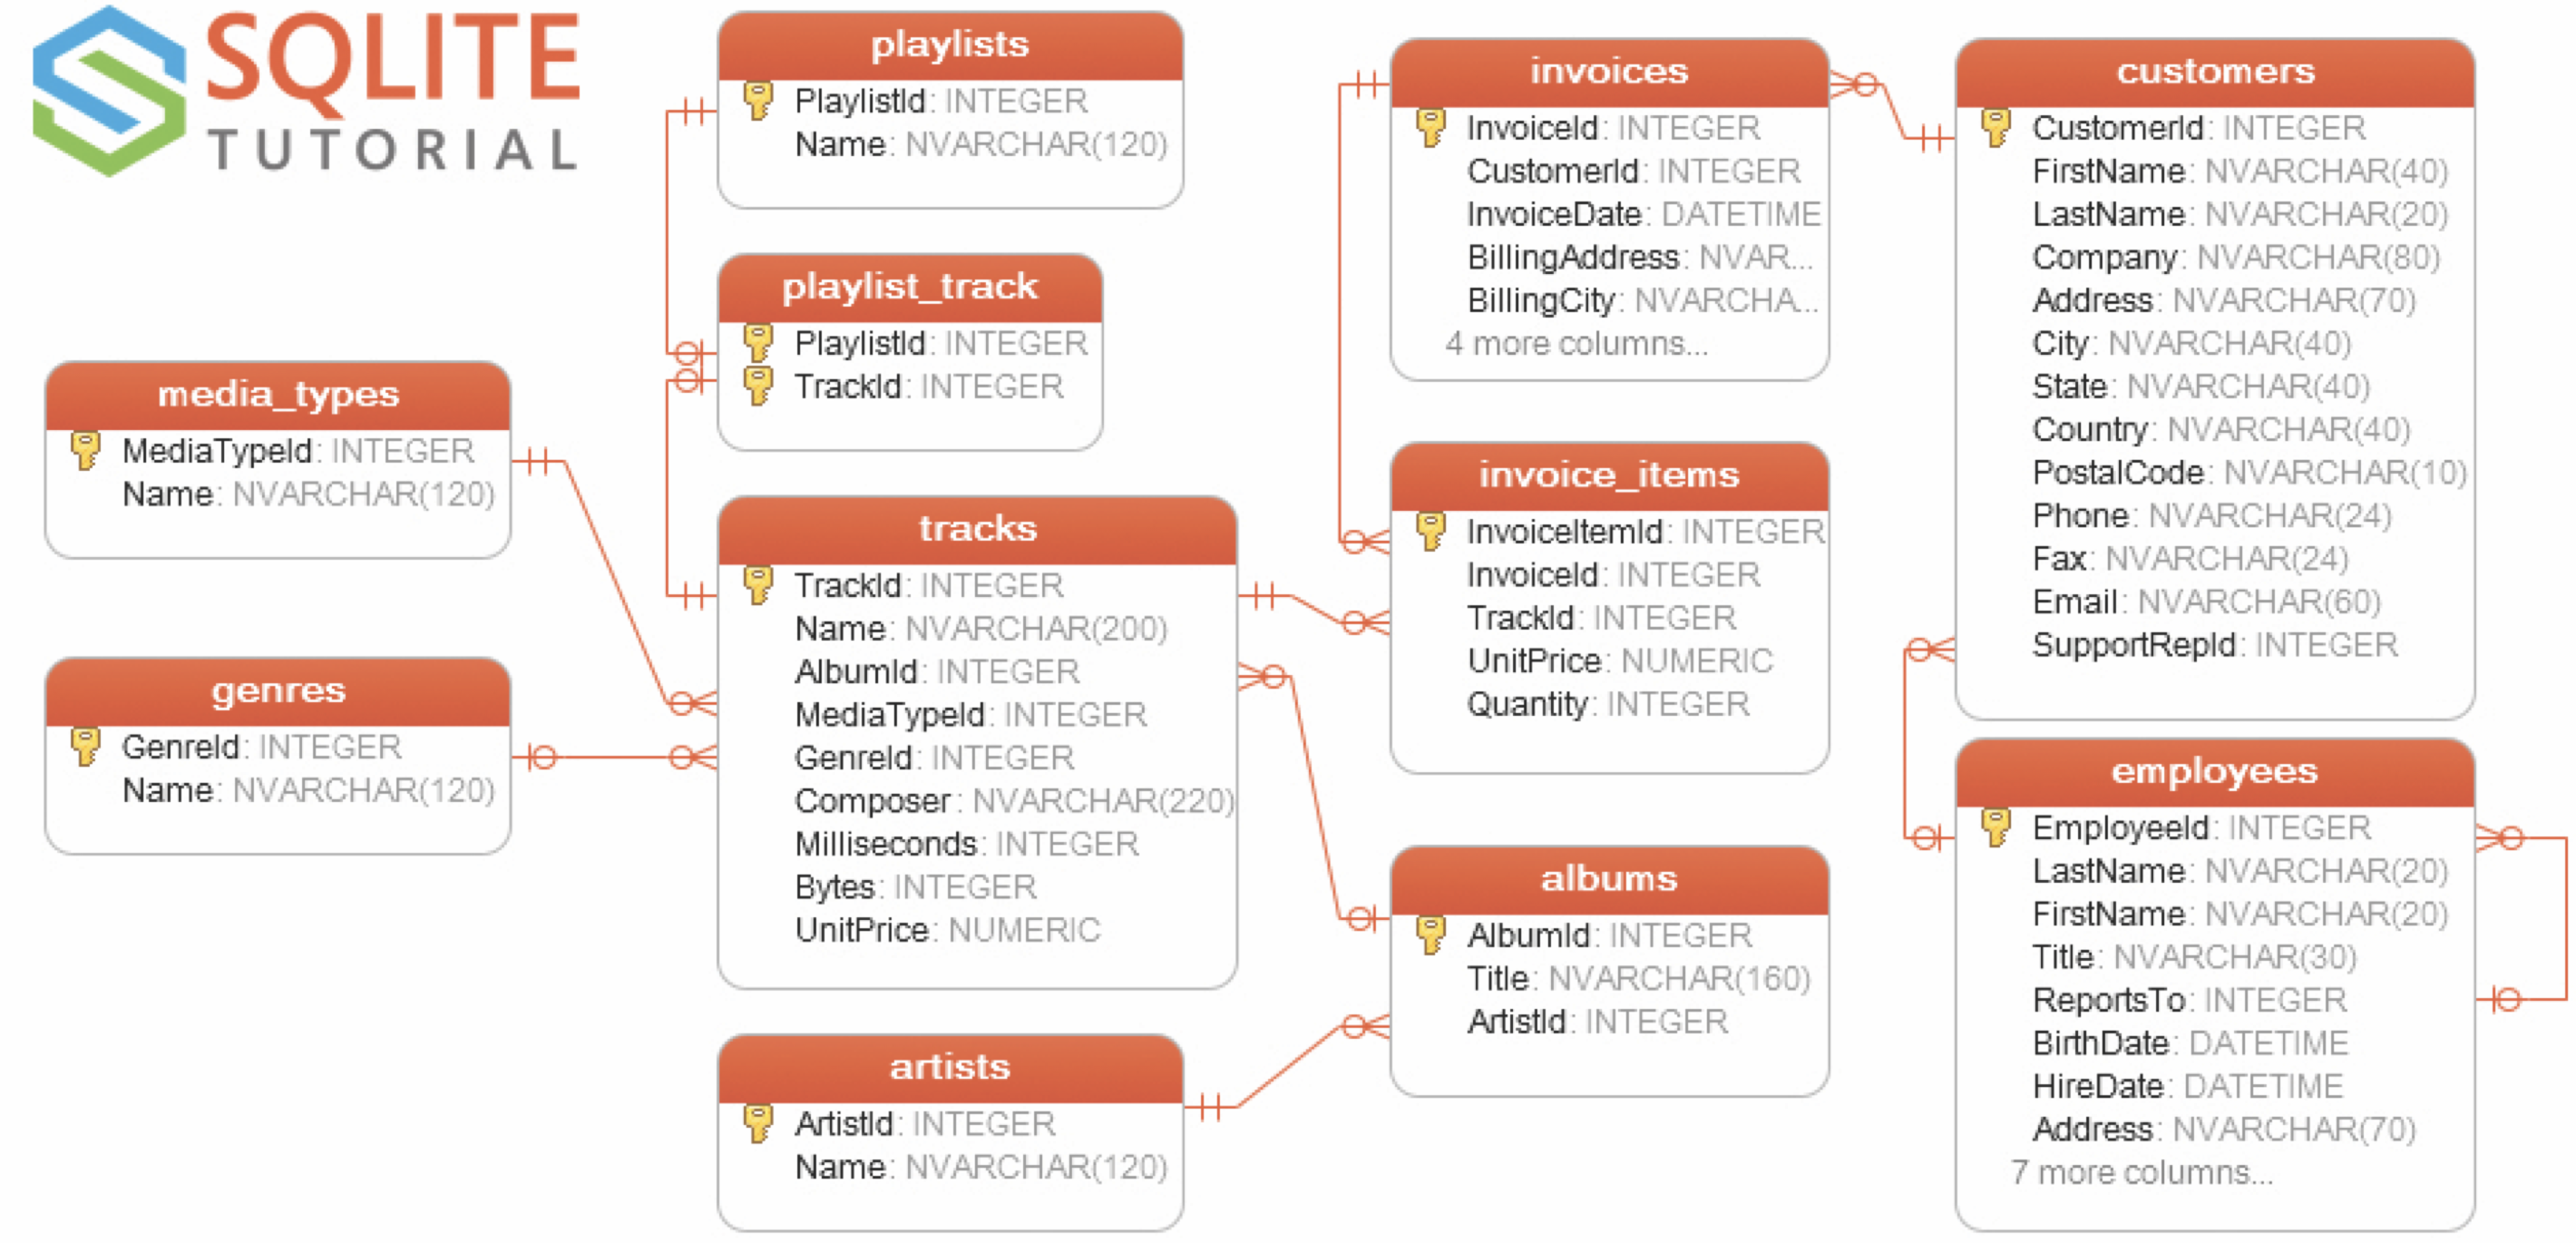

In [ ]:
import sqlite3

help (sqlite3)

In [ ]:
help(sqlite3.connect)

In [ ]:
import sqlite3

try:
    sqliteConnection = sqlite3.connect('SQLite_Python.db')
    cursor = sqliteConnection.cursor()
    print("Database created and Successfully Connected to SQLite")

    sqlite_select_Query = "select sqlite_version();"
    cursor.execute(sqlite_select_Query)
    record = cursor.fetchall()
    print("SQLite Database Version is: ", record)
    cursor.close()

except sqlite3.Error as error:
    print("Error while connecting to sqlite", error)
finally:
    if (sqliteConnection):
        sqliteConnection.close()
        print("The SQLite connection is closed")

## Data types of SQLite

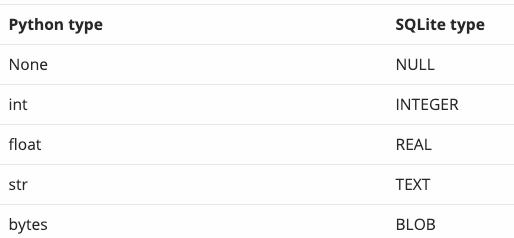

### Create a table

In [ ]:
import sqlite3

try:
    sqliteConnection = sqlite3.connect('SQLite_Python.db')
    sqlite_create_table_query = '''CREATE TABLE SqliteDb_developers (
                                id INTEGER PRIMARY KEY,
                                name TEXT NOT NULL,
                                email text NOT NULL UNIQUE,
                                joining_date datetime,
                                salary REAL NOT NULL);'''

    cursor = sqliteConnection.cursor()
    print("Successfully Connected to SQLite")
    cursor.execute(sqlite_create_table_query)
    sqliteConnection.commit()
    print("SQLite table created")

    cursor.close()

except sqlite3.Error as error:
    print("Error while creating a sqlite table", error)
finally:
    if (sqliteConnection):
        sqliteConnection.close()
        print("sqlite connection is closed")

### Execute a sql script

In [ ]:
import sqlite3

try:
    sqliteConnection = sqlite3.connect('SQLite_Python.db')
    cursor = sqliteConnection.cursor()
    print("Successfully Connected to SQLite")

    with open('./mySQLiteScript.sql', 'r') as sqlite_file:
        sql_script = sqlite_file.read()

    cursor.executescript(sql_script)
    print("SQLite script executed successfully")
    cursor.close()

except sqlite3.Error as error:
    print("Error while executing sqlite script", error)
finally:
    if (sqliteConnection):
        sqliteConnection.close()
        print("sqlite connection is closed")


### SQLite Database Exceptions

In [ ]:
# Try to insert into a table that doesn't exist

import sqlite3
import traceback
import sys

try:
    sqliteConnection = sqlite3.connect('SQLite_Python.db')
    cursor = sqliteConnection.cursor()
    print("Successfully Connected to SQLite")

    sqlite_insert_query = """INSERT INTO unknown_table_1
                          (id, text)  VALUES  (1, 'Demo Text')"""

    count = cursor.execute(sqlite_insert_query)
    sqliteConnection.commit()
    print("Record inserted successfully into SqliteDb_developers table ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Failed to insert data into sqlite table")
    print("Exception class is: ", error.__class__)
    print("Exception is", error.args)
    print('Printing detailed SQLite exception traceback: ')
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqliteConnection):
        sqliteConnection.close()
        print("The SQLite connection is closed")

### Change SQLite connection timeout when connecting from within Python

In [ ]:
import sqlite3

def readSqliteTable():
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqlite_select_query = """SELECT count(*) from SqliteDb_developers"""
        cursor.execute(sqlite_select_query)
        totalRows = cursor.fetchone()
        print("Total rows are:  ", totalRows)
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("The Sqlite connection is closed")

readSqliteTable()

### Identify total changes since the SQLite database connection was opened

In [ ]:
import sqlite3

try:
    sqliteConnection = sqlite3.connect('SQLite_Python.db')
    cursor = sqliteConnection.cursor()
    print("Connected to SQLite")

    sqlite_insert_query = """INSERT INTO SqliteDb_developers
                          (id, name, email, joining_date, salary) 
                          VALUES (4, 'Jos', 'jos@gmail.com', '2019-01-14', 9500);"""
    cursor.execute(sqlite_insert_query)

    sql_update_query = """Update SqliteDb_developers set salary = 10000 where id = 4"""
    cursor.execute(sql_update_query)

    sql_delete_query = """DELETE from SqliteDb_developers where id = 4"""
    cursor.execute(sql_delete_query)

    sqliteConnection.commit()
    cursor.close()

except sqlite3.Error as error:
    print("Error while working with SQLite", error)
finally:
    if (sqliteConnection):
        print("Total Rows affected since the database connection was opened: ", sqliteConnection.total_changes)
        sqliteConnection.close()
        print("sqlite connection is closed")


### Insert A row/record

In [ ]:
import sqlite3

try:
    sqliteConnection = sqlite3.connect('SQLite_Python.db')
    cursor = sqliteConnection.cursor()
    print("Successfully Connected to SQLite")

    sqlite_insert_query = """INSERT INTO SqliteDb_developers
                          (id, name, email, joining_date, salary) 
                           VALUES 
                          (1,'James','james@pynative.com','2019-03-17',8000)"""

    count = cursor.execute(sqlite_insert_query)
    sqliteConnection.commit()
    print("Record inserted successfully into SqliteDb_developers table ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Failed to insert data into sqlite table", error)
finally:
    if (sqliteConnection):
        sqliteConnection.close()
        print("The SQLite connection is closed")

## Using Python variables in SQLite INSERT query

In [ ]:
import sqlite3

def insertVaribleIntoTable(id, name, email, joinDate, salary):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqlite_insert_with_param = """INSERT INTO SqliteDb_developers
                          (id, name, email, joining_date, salary) 
                          VALUES (?, ?, ?, ?, ?);"""

        data_tuple = (id, name, email, joinDate, salary)
        cursor.execute(sqlite_insert_with_param, data_tuple)
        sqliteConnection.commit()
        print("Python Variables inserted successfully into SqliteDb_developers table")

        cursor.close()

    except sqlite3.Error as error:
        print("Failed to insert Python variable into sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("The SQLite connection is closed")

insertVaribleIntoTable(2, 'Joe', 'joe@pynative.com', '2019-05-19', 9000)
insertVaribleIntoTable(3, 'Ben', 'ben@pynative.com', '2019-02-23', 9500)

## Python Insert multiple rows into SQLite table using the cursor’s executemany()

In [ ]:
import sqlite3

def insertMultipleRecords(recordList):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqlite_insert_query = """INSERT INTO SqliteDb_developers
                          (id, name, email, joining_date, salary) 
                          VALUES (?, ?, ?, ?, ?);"""

        cursor.executemany(sqlite_insert_query, recordList)
        sqliteConnection.commit()
        print("Total", cursor.rowcount, "Records inserted successfully into SqliteDb_developers table")
        sqliteConnection.commit()
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to insert multiple records into sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("The SQLite connection is closed")

recordsToInsert = [(4, 'Jos', 'jos@gmail.com', '2019-01-14', 9500),
                   (5, 'Chris', 'chris@gmail.com', '2019-05-15',7600),
                   (6, 'Jonny', 'jonny@gmail.com', '2019-03-27', 8400)]

insertMultipleRecords(recordsToInsert)

## Python example to read all rows from the SqliteDb_developers table

In [ ]:
import sqlite3

def readSqliteTable():
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqlite_select_query = """SELECT * from SqliteDb_developers"""
        cursor.execute(sqlite_select_query)
        records = cursor.fetchall()
        print("Total rows are:  ", len(records))
        print("Printing each row")
        for row in records:
            print("Id: ", row[0])
            print("Name: ", row[1]) 
            print("Email: ", row[2])
            print("JoiningDate: ", row[3])
            print("Salary: ", row[4])
            print("\n")

        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("The SQLite connection is closed")

readSqliteTable()


### Use Python variables as parameters in SQLite Select Query

In [ ]:
import sqlite3

def getDeveloperInfo(id):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sql_select_query = """select * from SqliteDb_developers where id = ?"""
        cursor.execute(sql_select_query, (id,))
        records = cursor.fetchall()
        print("Printing ID ", id)
        for row in records:
            print("Name = ", row[1])
            print("Email  = ", row[2])
            print("JoiningDate  = ", row[3])
            print("Salary  = ", row[4])
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("The SQLite connection is closed")

getDeveloperInfo(2)

## Select a single row from SQLite table using cursor.fetchone()

In [ ]:
import sqlite3

def readSingleRow(developerId):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqlite_select_query = """SELECT * from SqliteDb_developers where id = ?"""
        cursor.execute(sqlite_select_query, (developerId, ))
        print("Reading single row \n")
        record = cursor.fetchone()
        print("Id: ", record[0])
        print("Name: ", record[1])
        print("Email: ", record[2])
        print("JoiningDate: ", record[3])
        print("Salary: ", record[4])

        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read single row from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("The SQLite connection is closed")

readSingleRow(3)

## Python example to delete a single row from the SQLite table

In [ ]:
import sqlite3

def deleteRecord():
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        # Deleting single record now
        sql_delete_query = """DELETE from SqliteDb_developers where id = 6"""
        cursor.execute(sql_delete_query)
        sqliteConnection.commit()
        print("Record deleted successfully ")
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to delete record from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("the sqlite connection is closed")

deleteRecord()

## Use Python Variable in a parameterized query to Delete Row from SQLite table

In [ ]:
import sqlite3

def deleteSqliteRecord(id):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sql_update_query = """DELETE from SqliteDb_developers where id = ?"""
        cursor.execute(sql_update_query, (id, ))
        sqliteConnection.commit()
        print("Record deleted successfully")

        cursor.close()

    except sqlite3.Error as error:
        print("Failed to delete reocord from a sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("sqlite connection is closed")

deleteSqliteRecord(5)

## Python Delete multiple rows from SQLite table

In [ ]:
import sqlite3

def deleteMultipleRecords(idList):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")
        sqlite_update_query = """DELETE from SqliteDb_developers where id = ?"""

        cursor.executemany(sqlite_update_query, idList)
        sqliteConnection.commit()
        print("Total", cursor.rowcount, "Records deleted successfully")
        sqliteConnection.commit()
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to delete multiple records from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("sqlite connection is closed")

idsToDelete = [(4,),(3,)]
deleteMultipleRecords(idsToDelete)

## Defining SQLite SQL Functions using Python

In [ ]:
help (str.title)

In [ ]:
import sqlite3

def _toTitleCase(string):
    return str(string).title()

def getDeveloperName(id):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqliteConnection.create_function("TOTILECASE", 1, _toTitleCase)
        select_query = "SELECT TOTILECASE(name) FROM SqliteDb_developers where id = ?"
        cursor.execute(select_query, (id,))
        name = cursor.fetchone()
        print("Developer Name is", name)
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("sqlite connection is closed")

getDeveloperName(2)

## Redefine existing SQLite SQL Functions using Python

In [ ]:
import sqlite3

def lower(string):
    return str(string).upper()

def getDeveloperName(id):
    try:
        sqliteConnection = sqlite3.connect('SQLite_Python.db')
        cursor = sqliteConnection.cursor()
        print("Connected to SQLite")

        sqliteConnection.create_function("lower", 1, lower)
        select_query = "SELECT lower(name) FROM SqliteDb_developers where id = ?"
        cursor.execute(select_query, (id,))
        name = cursor.fetchone()
        print("Developer Name is", name)
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to read data from sqlite table", error)
    finally:
        if (sqliteConnection):
            sqliteConnection.close()
            print("sqlite connection is closed")

getDeveloperName(1)